In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('C:\\Users\\JohnVinodhA\\Downloads\\training_sample.csv')

## Data sampling

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
UserID                     455401 non-null object
basket_icon_click          455401 non-null int64
basket_add_list            455401 non-null int64
basket_add_detail          455401 non-null int64
sort_by                    455401 non-null int64
image_picker               455401 non-null int64
account_page_click         455401 non-null int64
promo_banner_click         455401 non-null int64
detail_wishlist_add        455401 non-null int64
list_size_dropdown         455401 non-null int64
closed_minibasket_click    455401 non-null int64
checked_delivery_detail    455401 non-null int64
checked_returns_detail     455401 non-null int64
sign_in                    455401 non-null int64
saw_checkout               455401 non-null int64
saw_sizecharts             455401 non-null int64
saw_delivery               455401 non-null int64
saw_account_upgrade        455401 non-null int64
saw_ho

In [14]:
data.shape

(455401, 25)

In [15]:
data.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


0    436308
1     19093
Name: ordered, dtype: int64

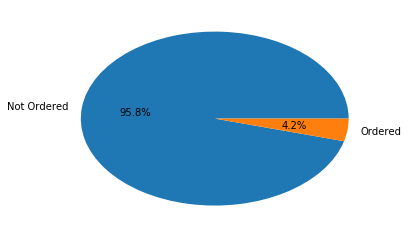

In [61]:
labels= 'Not Ordered','Ordered'
plt.pie(data['ordered'].value_counts(),autopct="%.1f%%",labels=labels)
data['ordered'].value_counts()

In [38]:
s0 = data.ordered[data.ordered.eq(0)].sample(5000).index
s1 = data.ordered[data.ordered.eq(1)].sample(5000).index 

df = data.loc[s0.union(s1)]

In [47]:
df['ordered'].value_counts()

1    5000
0    5000
Name: ordered, dtype: int64

## Exploratory Data Analysis

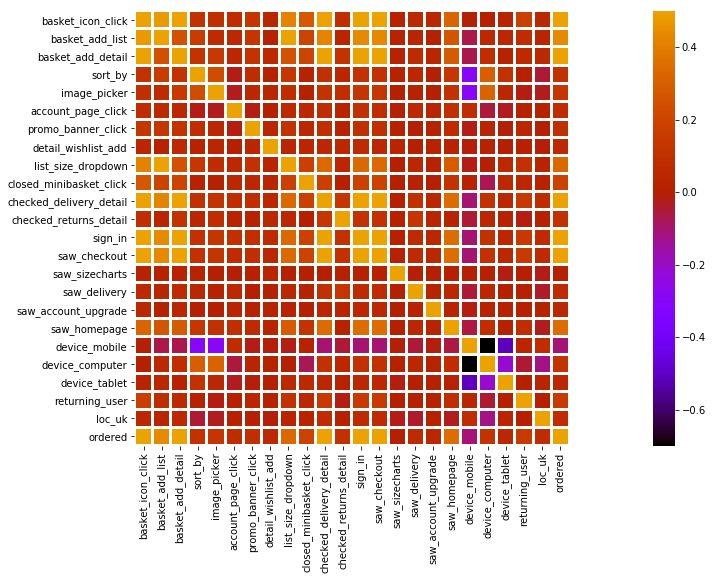

In [48]:
corr = df.corr()
plt.figure(figsize=(30,8))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='gnuplot')


In [76]:
ord=df.corr()['ordered'].sort_values(ascending=False)
ord.index

Index(['ordered', 'checked_delivery_detail', 'saw_checkout', 'sign_in',
       'basket_add_detail', 'basket_icon_click', 'basket_add_list',
       'saw_homepage', 'list_size_dropdown', 'closed_minibasket_click',
       'returning_user', 'image_picker', 'device_computer',
       'checked_returns_detail', 'sort_by', 'promo_banner_click', 'loc_uk',
       'account_page_click', 'saw_delivery', 'detail_wishlist_add',
       'saw_account_upgrade', 'device_tablet', 'saw_sizecharts',
       'device_mobile'],
      dtype='object')

Text(0.5,1,'Correlation of Ordered')

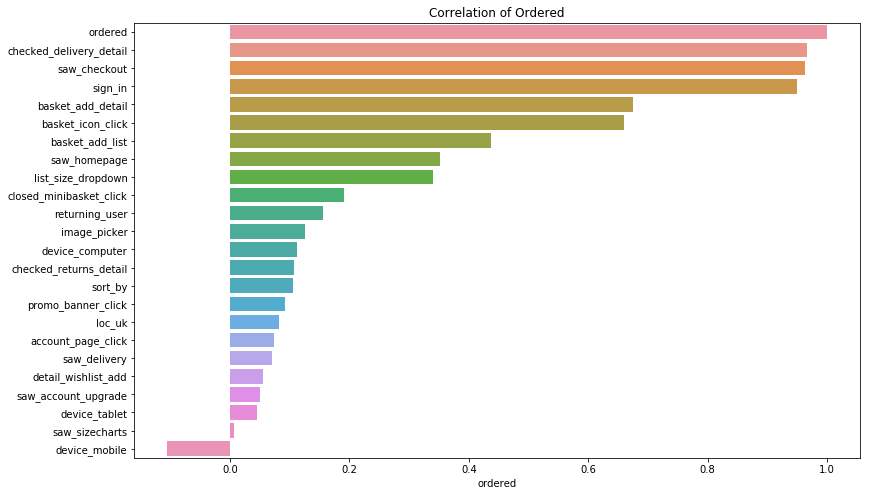

In [81]:
plt.figure(figsize=(13,8))
sns.barplot(x=ord,y=ord.index)
plt.title('Correlation of Ordered')

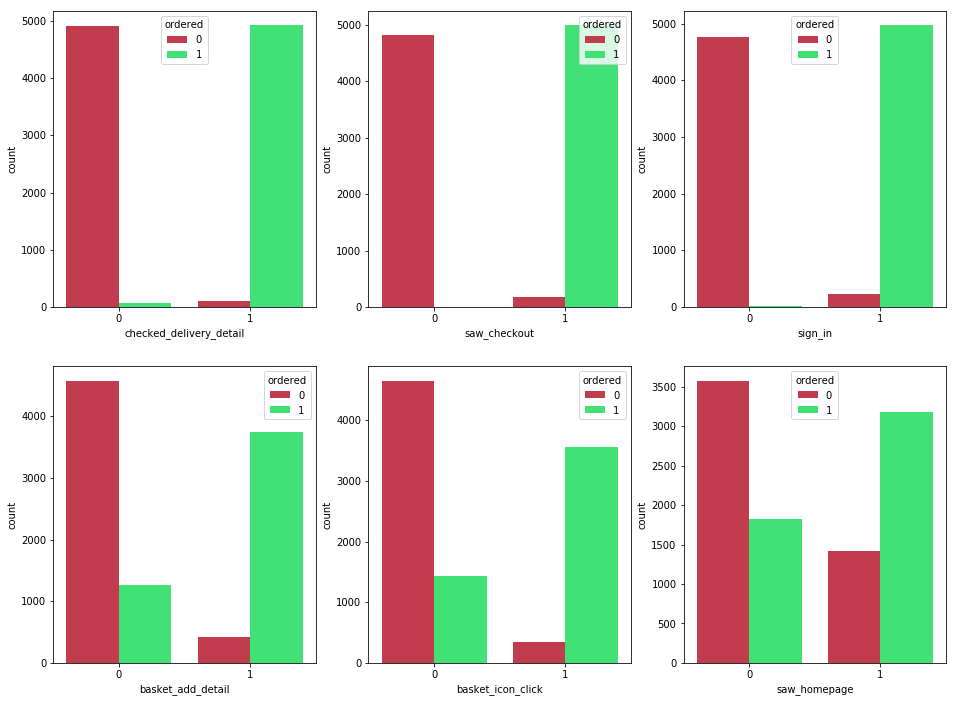

In [82]:
#Putting all the above results in a single visualization

fig_data=['checked_delivery_detail', 'saw_checkout', 'sign_in','basket_add_detail', 'basket_icon_click', 
                  'saw_homepage']
q=1
plt.figure(figsize=(16,12))
# Plot a grid with count plots of all categorical variables
for j in fig_data:
    plt.subplot(2,3,q)
    ax=sns.countplot(df[j],hue=df.ordered, palette=['#D7263D','#27FB6B'])
    plt.xlabel(j)
    q+=1
plt.show()

## Data Preprocessing

In [84]:
features = df.drop(['ordered','UserID'], axis=1)
target = df['ordered']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  =   train_test_split(features, target, test_size=.3)

print( "Training : ", X_train.shape, "Testing : ", X_test.shape )

Training :  (7000, 23) Testing :  (3000, 23)


## Modelling

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [122]:
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test,y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 98.80%


### Cross Validation

In [121]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X_train, y_train, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 99.11%


In [125]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.9917142857142857


In [123]:
import itertools
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

In [128]:
lr = LogisticRegression(C=0.1,penalty='l1').fit(X_train,y_train)    
print(lr)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [129]:
y_pred = lr.predict(X_test)


Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.98      0.99      1468
          1       0.99      0.99      0.99      1532

avg / total       0.99      0.99      0.99      3000


Confusion Matrix:
[[1445   23]
 [  12 1520]]


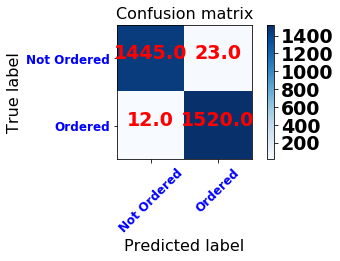

In [137]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes=['Not Ordered','Ordered'],title='Confusion matrix')


Classification Report:

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1468
          1       0.99      0.99      0.99      1532

avg / total       0.99      0.99      0.99      3000


Confusion Matrix:
[[1448   20]
 [  13 1519]]


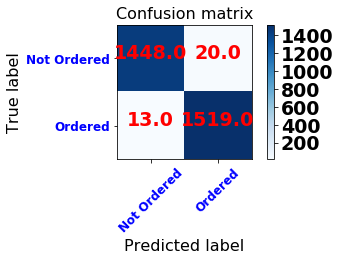

In [140]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier=classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)

#Analyze accuracy of predictions
import sklearn.metrics
sklearn.metrics.confusion_matrix(y_test,predictions)
print("\nClassification Report:\n")
print(classification_report(y_test,predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,predictions))
plot_confusion_matrix(confusion_matrix(y_test,predictions),classes=['Not Ordered','Ordered'],title='Confusion matrix')